# Unit 5 - Financial Planning


In [101]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [102]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [103]:
# Set current amount of crypto assets
# YOUR CODE HERE!


my_btc = {
    "shares": 1.2}
my_eth = {
    "shares": 5.3}

In [104]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

btc_data = requests.get(btc_url).json()
btc_data
eth_data = requests.get(eth_url).json()
eth_data
#requests.get(eth_url)



{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 114090823,
   'total_supply': 114090823,
   'max_supply': 0,
   'quotes': {'USD': {'price': 765.92,
     'volume_24h': 19723609482,
     'market_cap': 87634917845,
     'percentage_change_1h': 0.0813194598969956,
     'percentage_change_24h': 4.82207882421949,
     'percentage_change_7d': 22.2625111472275,
     'percent_change_1h': 0.0813194598969956,
     'percent_change_24h': 4.82207882421949,
     'percent_change_7d': 22.2625111472275}},
   'last_updated': 1609623531}},
 'metadata': {'timestamp': 1609623531,
  'num_cryptocurrencies': 1389,
  'error': None}}

In [105]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
print(f'BTC Price - ${btc_price}')


# Fetch current ETH price
# YOUR CODE HERE!
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
print(f'ETH Price - ${eth_price}')



# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc["shares"]
my_eth_value = eth_price * my_eth["shares"]
# Print current crypto wallet balance
print(f"The current value of your {my_btc['shares']} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth['shares']} ETH is ${my_eth_value:0.2f}")

BTC Price - $31567.0
ETH Price - $765.92
The current value of your 1.2 BTC is $37880.40
The current value of your 5.3 ETH is $4059.38


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [106]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = {
    "shares": 200}
my_spy = {
    "shares": 50}

In [107]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [108]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2017-12-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Preview DataFrame
# YOUR CODE HERE!
df_ticker_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2017-12-20 00:00:00-05:00  268.25  268.330  266.690  267.04  42133908  
2017-12-21 00:00:00-05:00  267.73  268.385  267.300  267.57  34999954  
2017-12-22 00:00:00-05:00  267.60  267.635  266.900  267.48  36604044  
2017-12-26 00:00:00-05:00  267.06  267.390  266.885  267.17  24888478  
2017-12-27 00:00:00-05:00  267.36  267.730  267.010  267.33  32573906

In [109]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_closing_prices = pd.DataFrame()

df_closing_prices["AGG"] = df_ticker_data["AGG"]["close"]
df_closing_prices["SPY"] = df_ticker_data["SPY"]["close"]

df_closing_prices.index = df_closing_prices.index.date

df_closing_prices.head(10)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${df_closing_prices['AGG'].iloc[-1]}")
print(f"Current SPY closing price: ${df_closing_prices['SPY'].iloc[-1]}")

Current AGG closing price: $117.81
Current SPY closing price: $369.13


In [110]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = df_closing_prices["AGG"].iloc[-1] * my_agg["shares"]
my_spy_value = df_closing_prices["SPY"].iloc[-1] * my_spy["shares"]
# Print current value of share

print(f"The current value of your {my_agg['shares']} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy['shares']} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $23562.00
The current value of your 50 SPY shares is $18456.50


### Savings Health Analysis

In [111]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
savings=[my_btc_value+my_eth_value, my_spy_value+my_agg_value]
# YOUR CODE HERE!
df_savings = pd.DataFrame(savings, columns=['amount'], index=['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,41939.776
shares,42018.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

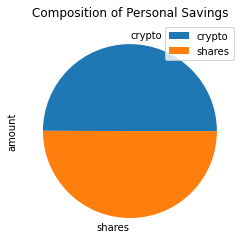

In [112]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [114]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
#emergency_fund df_savings sum()
total_savings=float(df_savings.sum())
# Validate saving health
# YOUR CODE HERE! remember two conditionals for with and without enough
if total_savings>emergency_fund: 
    print(f'Congratulations, you have enough money to invest! With ${(total_savings - emergency_fund):0.2f} excess')
else:
    print(f'You do not have enough money to invest!')

Congratulations, you have enough money to invest! With $47958.28 excess


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [115]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [116]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [117]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [118]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [119]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994296,0.999743,0.976444,0.987544,0.995970,1.009400,0.995569,0.997853,1.001392,0.999320,...,1.007801,1.014430,1.010779,0.996628,1.004011,1.003138,1.001478,0.994852,1.004361,1.005321
2,0.991130,1.004156,0.978613,0.994297,0.987454,1.009947,1.000360,0.990163,1.010368,1.009752,...,1.008057,1.019295,1.004612,1.002616,1.008734,1.006935,1.010438,1.006951,1.007933,0.992962
3,0.993814,1.010678,0.966197,0.996541,0.994589,0.999399,0.989201,0.999778,1.020907,1.019406,...,1.010489,1.018052,1.017034,0.986514,1.010489,1.015801,1.005287,1.011374,1.008193,1.001392
4,0.980145,1.006657,0.977380,0.992924,0.995663,1.006951,0.990353,0.984225,1.029541,1.018042,...,1.011812,0.995706,1.026035,0.998362,1.005589,1.021670,1.021397,1.014889,1.016605,0.999653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.659133,4.502069,7.526756,10.346726,6.578584,12.510423,24.462241,7.041711,12.570706,14.311911,...,34.312161,5.165417,6.695768,7.119202,8.551265,12.396091,9.788578,7.526338,2.863686,7.438857
7557,6.633444,4.582568,7.547003,10.351886,6.538560,12.364374,24.214284,6.994835,12.598353,14.252361,...,33.796321,5.206127,6.702621,7.117751,8.660755,12.365585,9.767608,7.624169,2.871396,7.523199
7558,6.585678,4.610507,7.416756,10.372865,6.563952,12.235582,24.335089,6.959955,12.580571,14.310668,...,33.853938,5.183599,6.710085,7.092429,8.625659,12.389294,9.676499,7.540716,2.875483,7.490974
7559,6.591095,4.597005,7.483387,10.372175,6.635509,12.413758,24.265738,6.967131,12.674124,14.454798,...,34.246862,5.226764,6.841608,7.059323,8.775401,12.373881,9.686342,7.523970,2.862100,7.456774


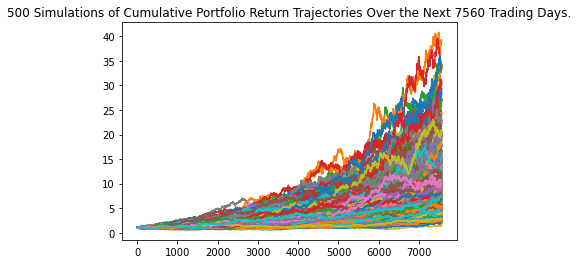

In [120]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_dist.plot_simulation()

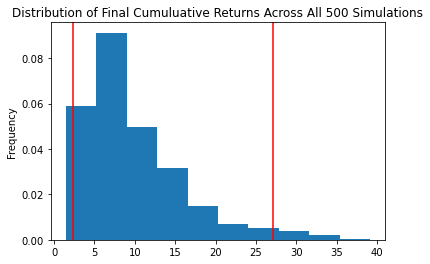

In [121]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [122]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_tbl)

count           500.000000
mean              9.799113
std               6.269746
min               1.445013
25%               5.621343
50%               7.952951
75%              12.625045
max              39.141209
95% CI Lower      2.370805
95% CI Upper     27.162124
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [123]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary_tbl[8]*20000,2)
ci_upper = round(summary_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47416.1 and $543242.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [124]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $71124.15 and $814863.72


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [125]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [126]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001539,0.997486,1.009163,1.007837,0.997491,0.999943,1.009052,1.000669,0.999330,1.000707,...,1.001906,1.001978,1.001485,0.989802,0.991841,1.006465,1.004100,0.996548,1.004185,1.001265
2,0.995100,0.990906,1.004807,1.006582,1.013912,0.994238,1.008760,0.998252,0.995859,1.004111,...,1.007032,0.992620,0.994544,0.983418,1.003988,1.004649,1.017860,0.993500,1.013413,1.002766
3,0.994126,0.991036,0.992058,1.002794,1.013648,0.997616,1.003966,1.003898,0.999993,1.001075,...,1.003500,0.994981,1.009601,0.995729,1.006843,0.997363,1.010947,1.007619,1.017121,1.010698
4,1.000261,0.994489,1.000723,0.989159,1.002099,0.998630,1.016389,0.991443,0.999038,1.006633,...,1.009420,0.991084,1.006896,0.988604,1.014297,0.989283,1.013628,1.013664,1.022758,1.008152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.548155,1.552298,1.157786,1.192750,1.350406,1.835914,1.267182,1.786538,1.487193,1.315970,...,0.946004,1.280284,1.373485,1.157203,1.453288,1.312921,1.077113,1.058649,1.723066,1.517672
1257,1.536768,1.546427,1.146029,1.191677,1.361994,1.879345,1.277958,1.808876,1.478564,1.302642,...,0.947756,1.283578,1.377696,1.172237,1.440782,1.299000,1.074825,1.053000,1.738485,1.508026
1258,1.545775,1.565718,1.152945,1.193816,1.363179,1.882571,1.278175,1.812273,1.488348,1.323311,...,0.936091,1.289857,1.362106,1.176192,1.437703,1.299872,1.067908,1.049364,1.729815,1.508100
1259,1.545244,1.573797,1.141433,1.195440,1.367104,1.899813,1.264917,1.788292,1.478356,1.323424,...,0.941840,1.299088,1.367292,1.174451,1.425167,1.289214,1.072074,1.033652,1.723895,1.495491


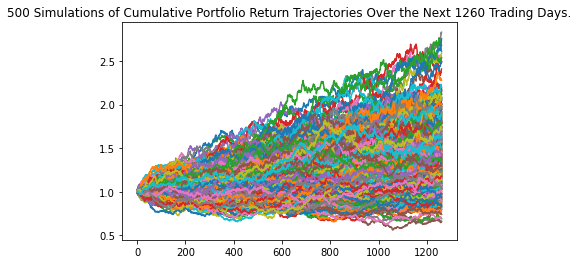

In [127]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_dist.plot_simulation()

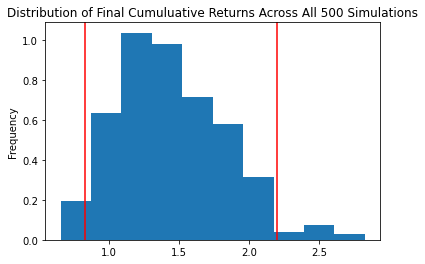

In [128]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_dist.plot_distribution()

In [129]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_tbl_two = MC_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_tbl_two)

count           500.000000
mean              1.445063
std               0.383704
min               0.652353
25%               1.178731
50%               1.401840
75%               1.696482
max               2.829118
95% CI Lower      0.826883
95% CI Upper      2.201474
Name: 1260, dtype: float64


In [130]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(summary_tbl_two[8]*initial_investment,2)
ci_upper_five = round(summary_tbl_two[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16537.65 and $44029.48


### Ten Years Retirement Option

In [131]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [132]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012767,1.011336,1.000042,0.999795,1.005099,1.001047,0.997507,1.000465,1.006093,0.997439,...,1.000137,0.997419,1.004489,0.994185,1.003475,0.996481,0.981188,0.997608,1.000025,1.011386
2,1.014680,1.013542,1.003852,1.011684,1.016963,1.004841,1.004521,1.002674,0.997462,0.998950,...,0.998342,0.991491,1.010126,0.997894,0.994934,1.000377,0.996014,0.991038,1.010179,1.023973
3,1.008041,1.016908,0.997795,1.006771,1.012573,1.009582,1.000588,0.993902,1.005202,0.987499,...,0.998795,0.993938,1.019648,1.000746,0.986948,1.003651,0.986093,0.993315,1.006815,1.030060
4,1.009445,1.022563,0.994276,0.989947,1.015648,1.007105,1.006013,0.996623,1.008595,0.993589,...,1.000687,0.987390,1.024880,1.011812,0.983135,1.011846,0.996715,0.992522,1.007893,1.027176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.108699,1.502022,2.465709,1.676620,3.860854,1.410904,1.531679,2.011962,0.988176,1.181522,...,1.335552,4.836789,1.870938,2.204585,5.706470,1.377314,2.749600,2.133380,3.480236,2.539498
2517,2.138383,1.525142,2.482771,1.673373,3.877417,1.416912,1.523609,2.023908,0.988976,1.175124,...,1.345948,4.848049,1.869221,2.222099,5.686052,1.382884,2.755009,2.162557,3.488421,2.542926
2518,2.156629,1.532918,2.472440,1.680684,3.882429,1.414772,1.536951,2.010049,0.994793,1.180683,...,1.349205,4.856910,1.861354,2.229660,5.686156,1.389636,2.735456,2.163517,3.491434,2.524646
2519,2.118087,1.531591,2.439305,1.653062,3.911976,1.416164,1.533854,2.016612,0.985526,1.192080,...,1.356360,4.869682,1.894392,2.239747,5.657480,1.397575,2.702755,2.153329,3.426596,2.528011


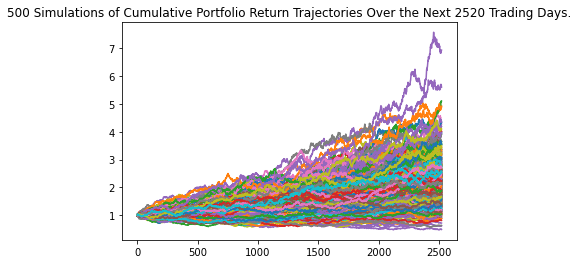

In [133]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_dist.plot_simulation()

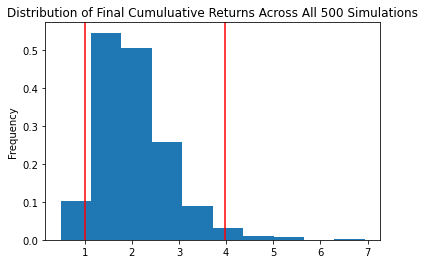

In [134]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_dist.plot_distribution()

In [135]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_tbl_three = MC_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_tbl_three)

count           500.000000
mean              2.054362
std               0.777198
min               0.486450
25%               1.498540
50%               1.944048
75%               2.434087
max               6.942114
95% CI Lower      1.001229
95% CI Upper      3.972918
Name: 2520, dtype: float64


In [136]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(summary_tbl_three[8]*initial_investment,2)
ci_upper_ten = round(summary_tbl_three[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $20024.58 and $79458.35
